In [1]:
import glossary_eval
import imp
imp.reload(glossary_eval)
from scipy.stats import ttest_ind, pearsonr
import matplotlib.pyplot as plt
import os
import csv
from collections import defaultdict, Counter
import tqdm
import numpy as np
import matplotlib as mpl
from scipy.stats import mannwhitneyu
mpl.rcParams['figure.dpi'] = 300
import pandas as pd

/mnt/data0/lucy/anaconda3/envs/bert/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/data0/lucy/anaconda3/envs/bert/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/data0/lucy/anaconda3/envs/bert/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/mnt/data0/lucy/anaconda3/envs/bert/lib/pyt

In [2]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'finetuned_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_sense_pmi/'
DN_SENSE_PMI_DIR = LOG_DIR + 'denoised_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [3]:
sr2terms = glossary_eval.get_sr2terms()

## Finetuned Sense PMI

In [4]:
'''
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

print(len(gloss_vals))
print(len(not_gloss_vals))

print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)

print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            score = max(w2score[w])
            #if w in gloss_terms and score < 3.00:
            #    print(subreddit, w, score)
            if w not in gloss_terms and score > 4.00: 
                print(subreddit, w, score)
'''
pass

## Base Sense PMI
### maximum pmi

In [5]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
'''
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)
'''

100%|██████████| 474/474 [00:03<00:00, 123.75it/s]


Ttest_indResult(statistic=44.845193699421436, pvalue=0.0)
MannwhitneyuResult(statistic=125866556.5, pvalue=2.028451207806043e-192)
2.2033353420545043
0.5455516114294339


'\nplt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor=\'lightblue\', histtype= "stepfilled")\nplt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor=\'orange\', histtype= "stepfilled")\nplt.yscale(\'log\')\nplt.ylabel(\'# of words\', fontsize=15)\nplt.xlabel(\'max sense pmi\', fontsize=15)\n'

### most common sense pmi

100%|██████████| 474/474 [00:00<00:00, 673.22it/s]


Ttest_indResult(statistic=44.62291429472068, pvalue=0.0)
MannwhitneyuResult(statistic=126135895.5, pvalue=1.370829130932747e-194)
2.0143405444514055
0.33440613628156346


Text(0.5, 0, 'most common sense pmi')

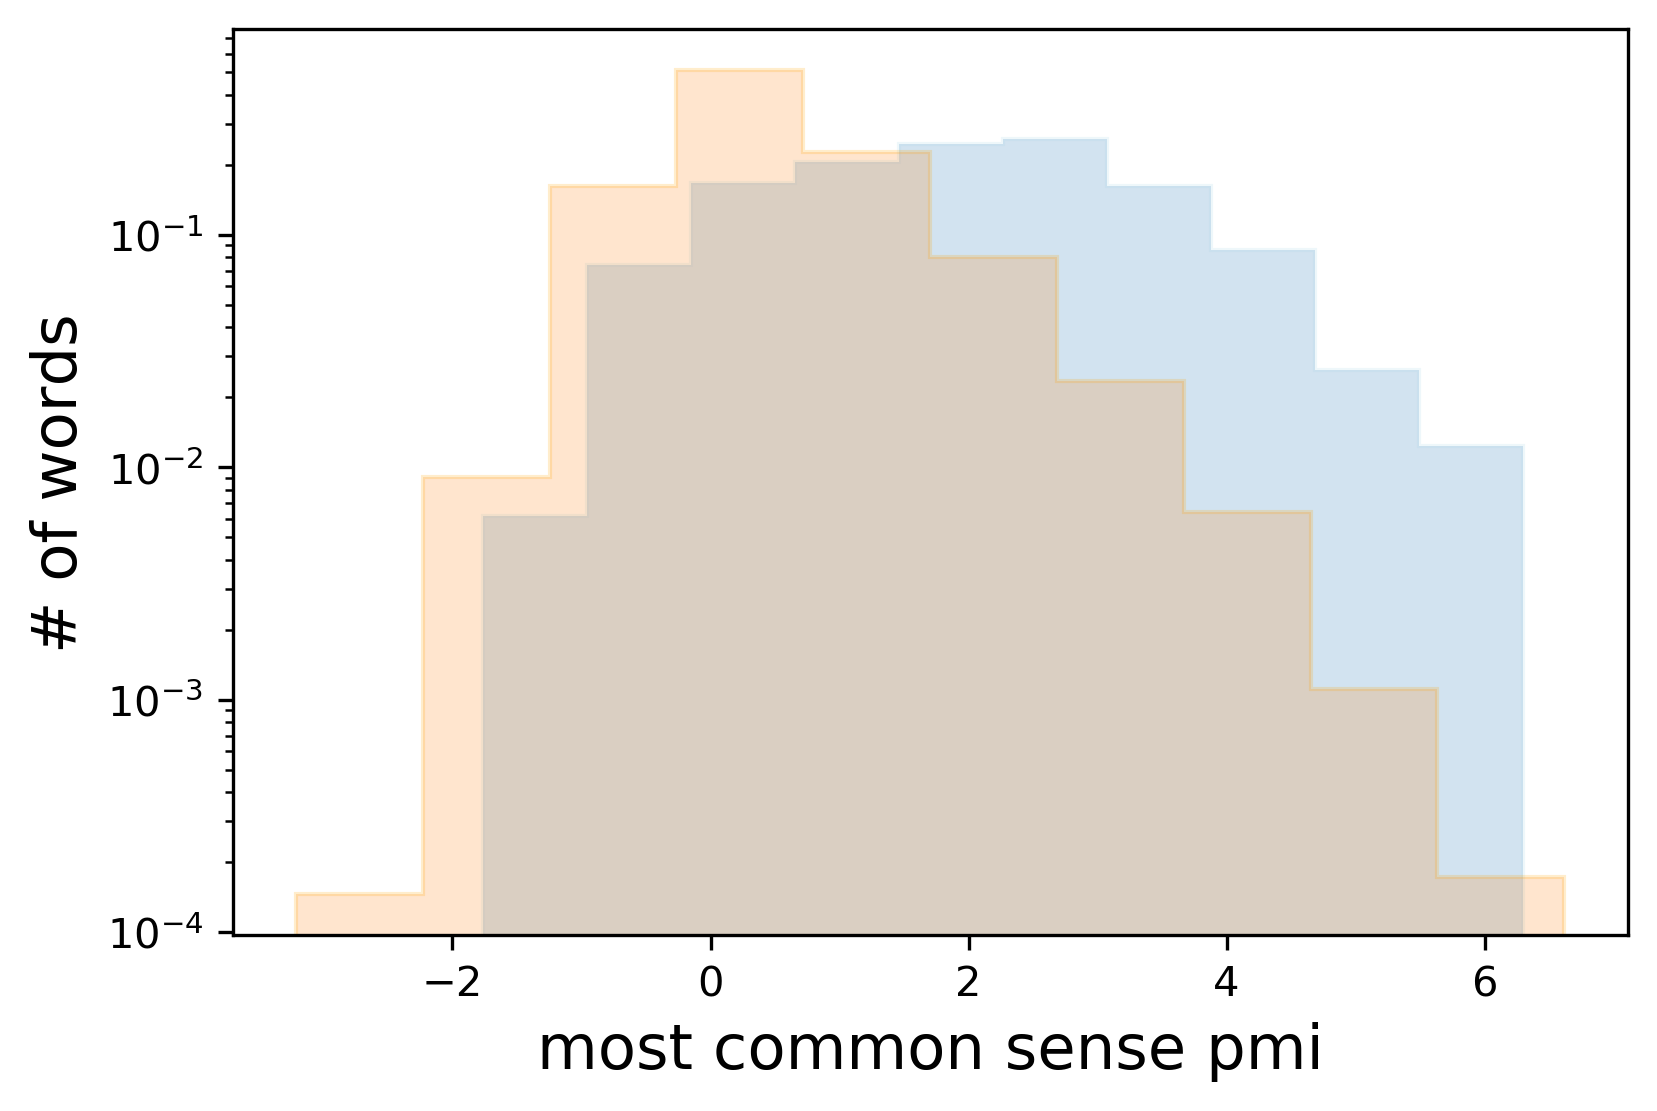

In [6]:
# sense_pmi of most common sense of a word
BASE_MOST_PMI = LOG_DIR + 'base_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('most common sense pmi', fontsize=15)

### Compare most_pmi with max_pmi for BERT embeddings

In [7]:
# compare most_pmi with max_pmi
BASE_MAX_PMI = LOG_DIR + 'base_max_sense_pmi/'
x = []
y = []
words = []
for filename in tqdm.tqdm(sorted(os.listdir(BASE_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(BASE_MAX_PMI + filename, encoding='utf-8').fillna('')
    df2 = pd.read_csv(BASE_MOST_PMI + filename, encoding='utf-8').fillna('')
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    words.extend(df3['word'].tolist())
    x.extend(df3['max_pmi'].tolist())
    y.extend(df3['most_pmi'].tolist())
print("Pearson r:", pearsonr(x, y))

100%|██████████| 474/474 [00:07<00:00, 61.29it/s]


Pearson r: (0.9458587375042024, 0.0)


## Substitute PMI
### max pmi

  0%|          | 0/349 [00:00<?, ?it/s]

Ttest_indResult(statistic=41.09003544309452, pvalue=0.0)
MannwhitneyuResult(statistic=78966092.5, pvalue=4.1984389971577276e-163)
2.228191176536358
0.5659246416730789


100%|██████████| 349/349 [00:09<00:00, 36.65it/s]


Pearson r: (0.6247216450523514, 0.0)


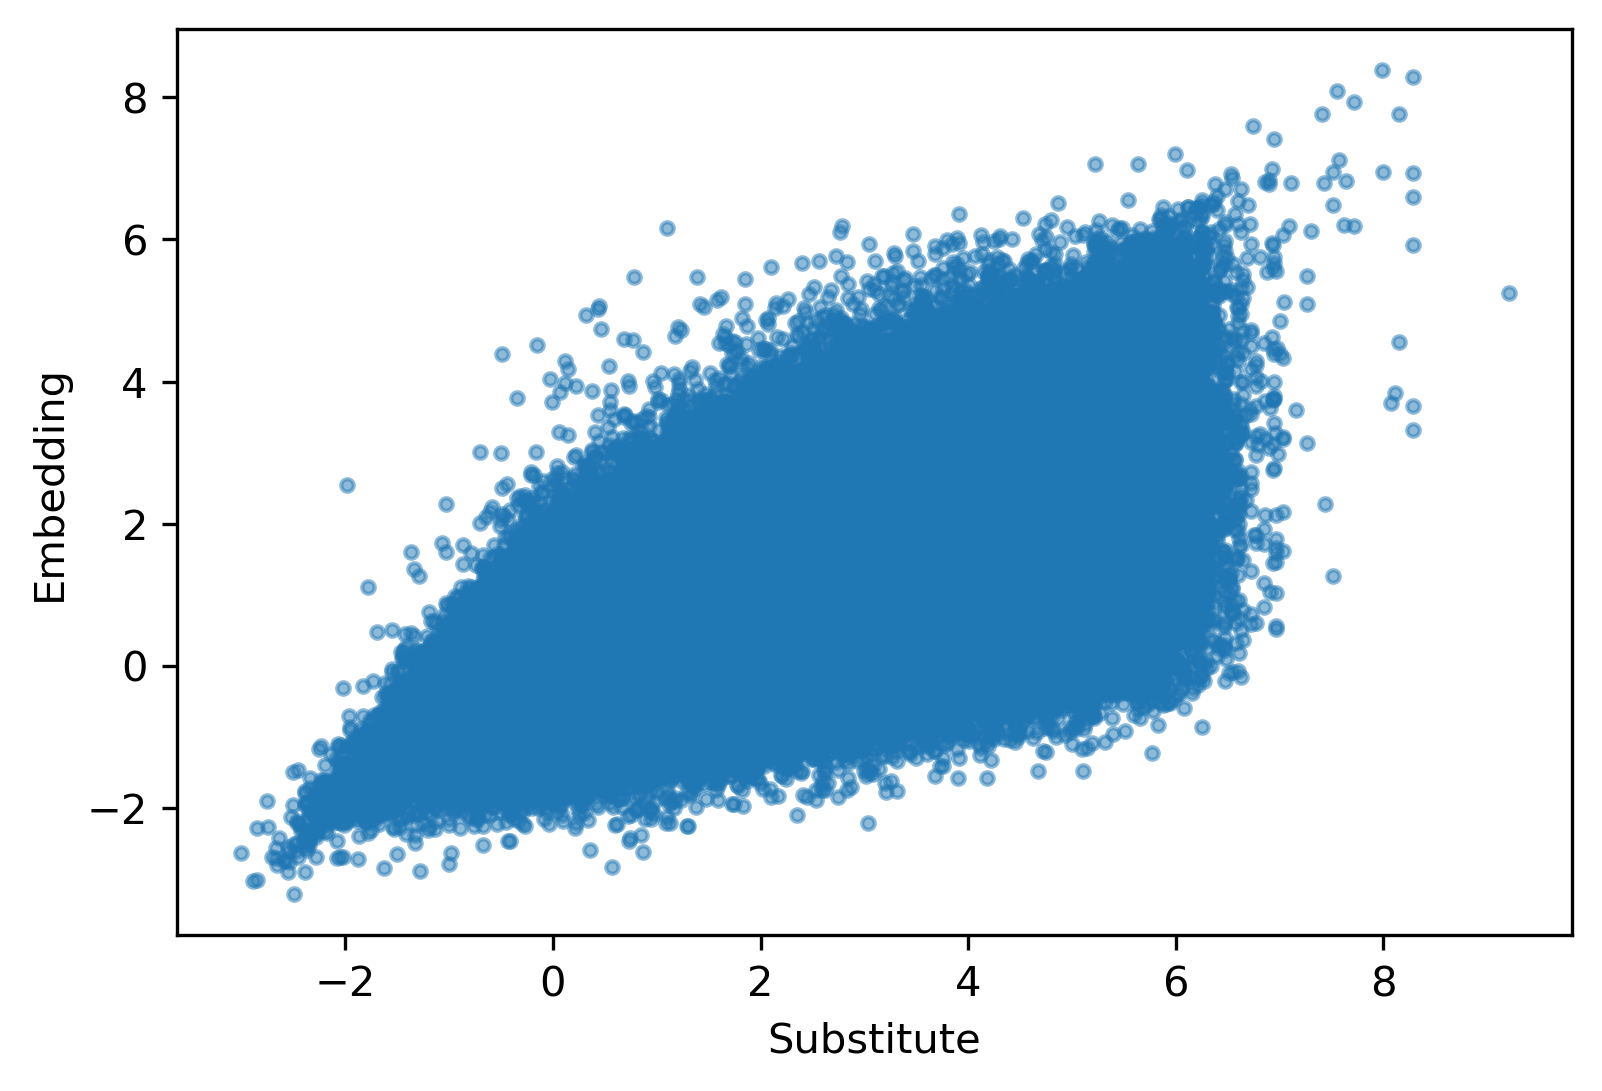

In [8]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['sense'].split('#####')[0]
            score = float(row['pmi'])
            w2score[w].append(score)
        for w in w2score: 
            if w in gloss_terms: 
                gloss_vals.append(max(w2score[w]))
            else: 
                not_gloss_vals.append(max(w2score[w]))

print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
'''
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('max sense pmi', fontsize=15)
'''
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_max_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['max_pmi_x'].tolist())
    y.extend(df3['max_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

### most common sense pmi

100%|██████████| 349/349 [00:01<00:00, 229.63it/s]


Ttest_indResult(statistic=38.895487168624484, pvalue=0.0)
MannwhitneyuResult(statistic=78409861.5, pvalue=3.546229743367168e-157)
1.732496108750208
0.23395815110961607


Text(0.5, 0, 'most common sense pmi')

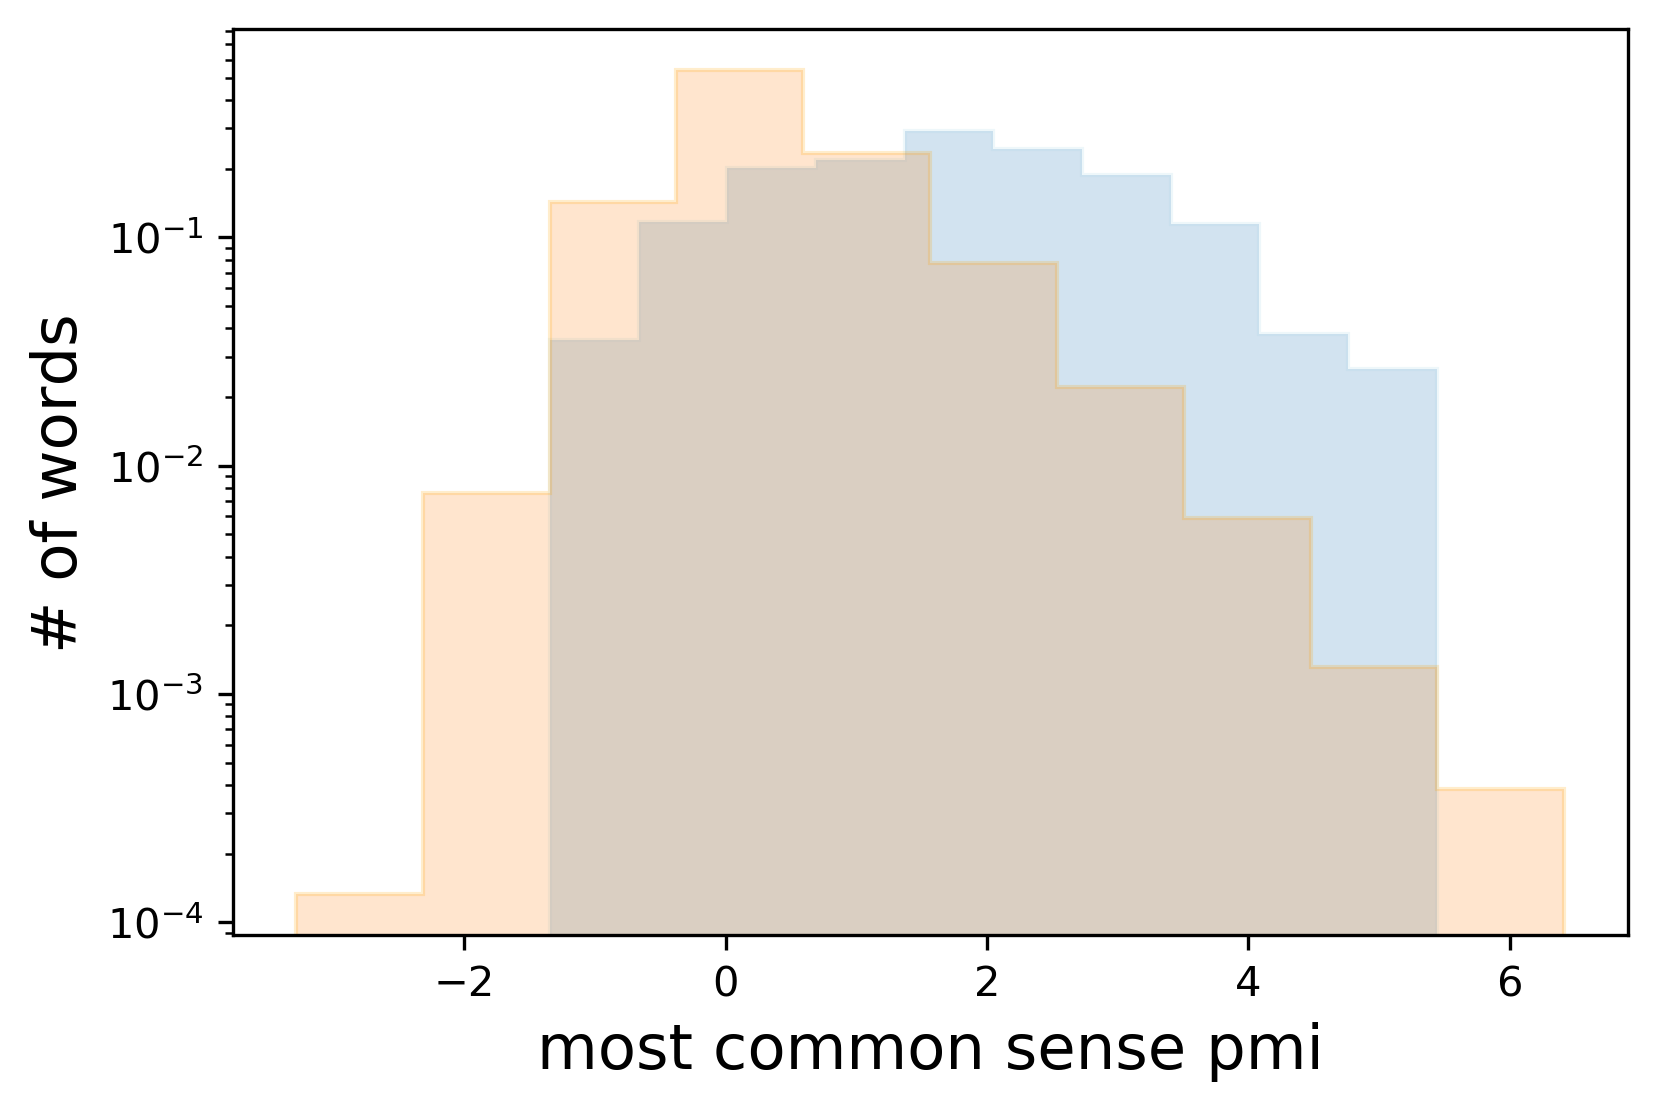

In [9]:
# sense_pmi of most common sense of a word
AG_MOST_PMI = LOG_DIR + 'ag_most_sense_pmi/'
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_MOST_PMI))): 
    subreddit = filename.replace('.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(AG_MOST_PMI + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['most_pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('most common sense pmi', fontsize=15)

### compare subsitute-based method with embedding-based method

100%|██████████| 349/349 [00:11<00:00, 29.27it/s]


Pearson r: (0.9137956058214248, 0.0)


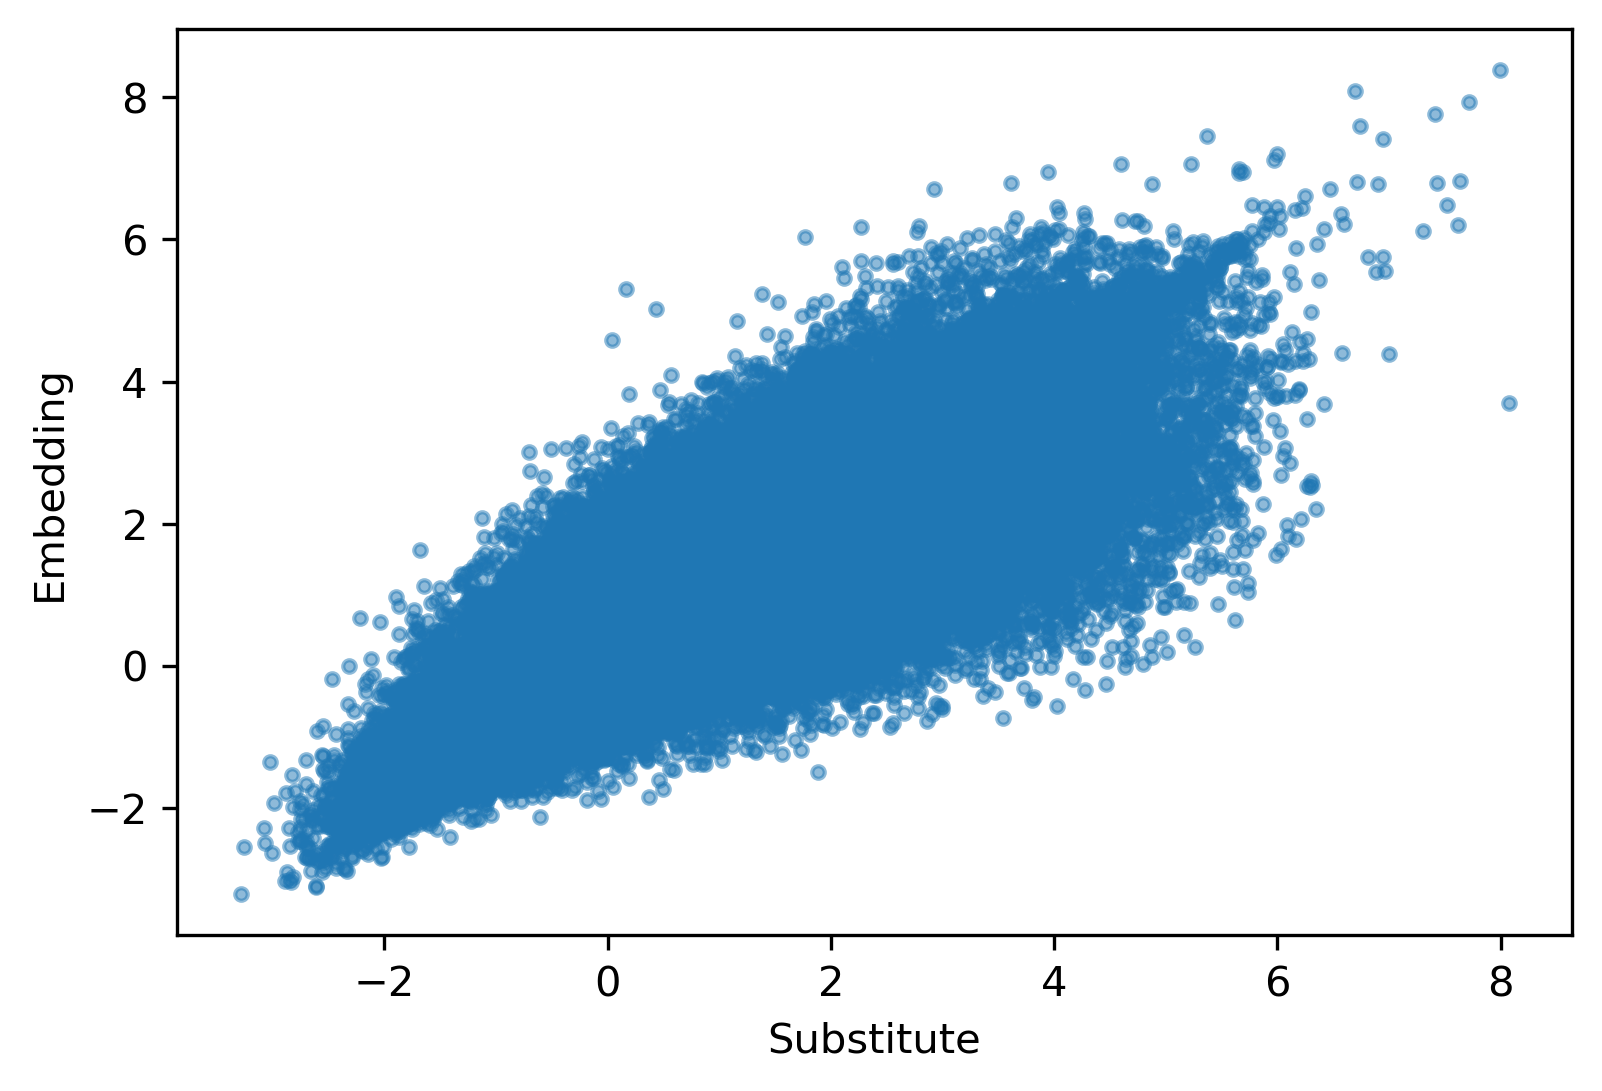

In [10]:
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
x = []
y = []
for filename in tqdm.tqdm(sorted(os.listdir(AG_SENSE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '')
    df1 = pd.read_csv(AG_SENSE_PMI_DIR + filename)
    df2 = pd.read_csv(BASE_SENSE_PMI_DIR + filename)
    assert(len(df1) == len(df2))
    df3 = pd.merge(df1, df2, on='word')
    x.extend(df3['most_pmi_x'].tolist())
    y.extend(df3['most_pmi_y'].tolist())
print("Pearson r:", pearsonr(x, y))
plt.scatter(x, y, alpha=0.5, marker = '.')
plt.xlabel("Substitute")
plt.ylabel("Embedding")
plt.show()

## Type PMI

100%|██████████| 474/474 [00:04<00:00, 115.50it/s]


2184
431773
Ttest_indResult(statistic=74.34385215831978, pvalue=0.0)


  0%|          | 0/474 [00:00<?, ?it/s]

MannwhitneyuResult(statistic=781729601.0, pvalue=0.0)
2.7539354583977698
0.20878454230275614


  6%|▌         | 28/474 [00:00<00:06, 69.78it/s]

aquariums tbh -0.2905498403630227
aquariums imo -0.17780007645732757
askgaybros sub -0.29530515782475364
asoiaf subreddit -1.0915961393465712
asoiaf op -0.7949646829969779
asoiaf lol -0.47447671324461604
asoiaf so -0.005748123408464535


 16%|█▋        | 78/474 [00:00<00:04, 91.70it/s]

boxoffice for -0.39771981607065415
boxoffice am -0.37310504731282074
cats quick -0.32804615243083535


 19%|█▉        | 89/474 [00:00<00:04, 88.43it/s]

childfree so 0.002536651076899888
churning y -0.009402576056636113
clashroyale control -0.12902033945379635
competitiveoverwatch stick -0.15938996167149058
competitiveoverwatch control -0.018473295531109785


 28%|██▊       | 132/474 [00:01<00:04, 80.96it/s]

datingoverthirty so -0.28506314078552036
deadbydaylight is -0.1864920938064696
dnd sad -1.159013359871753
dnd mad -0.13702847076239175
dota2 b -0.2547516232434246
dota2 p -0.09130484760340599
dota2 back -0.013653026022891328


 34%|███▍      | 161/474 [00:01<00:03, 88.40it/s]

elderscrollsonline hot -0.7553906454889251
elderscrollsonline c -0.6274730014836455
elderscrollsonline drink -0.42431750908064503
elderscrollsonline tell -0.3479220047944088
elderscrollsonline war -0.33951587705339675
elderscrollsonline op -0.06330968005348456
elderscrollsonline so -0.04218877710628765
exmormon imo -0.6541672298602986
exmormon fair -0.05995946922589513
exmormon by -0.0016699654739106883


 36%|███▌      | 171/474 [00:02<00:04, 64.97it/s]

fifa if 0.010210272164226701
fireemblemheroes r -0.7048580739843106
fireemblemheroes is -0.32232014867072334
future_fight if -0.30416526224152596
future_fight he -0.24174053427306197


 51%|█████     | 242/474 [00:02<00:02, 79.62it/s]

hearthstone pain -0.23034087368394834
hearthstone out -0.14423143541058978
justnomil f -0.5718392214032035
justnomil so -0.11030330385971601


 72%|███████▏  | 341/474 [00:03<00:01, 128.12it/s]

ps4 btw -0.33330605035693583
purplepilldebate so -0.9200236405171468


 82%|████████▏ | 390/474 [00:03<00:00, 141.06it/s]

skincareaddiction he -1.6406332727888795
skincareaddiction pc -0.8253695684219915
skincareaddiction to -0.08224424135036393


 94%|█████████▍| 447/474 [00:03<00:00, 143.21it/s]

thedivision hot -1.0537242079647602
thedivision class -0.3665629977586232
thedivision epic -0.17889088240669557
thedivision pull -0.15652049486299607


100%|██████████| 474/474 [00:03<00:00, 119.73it/s]


wow hot -0.7269374281943174
wow c -0.4890907967601963
wow b -0.4472481003151234
wow g -0.35780627561192874
wow s -0.173426909788599
wow m -0.06799723030799784
wow if -0.006477415470900067


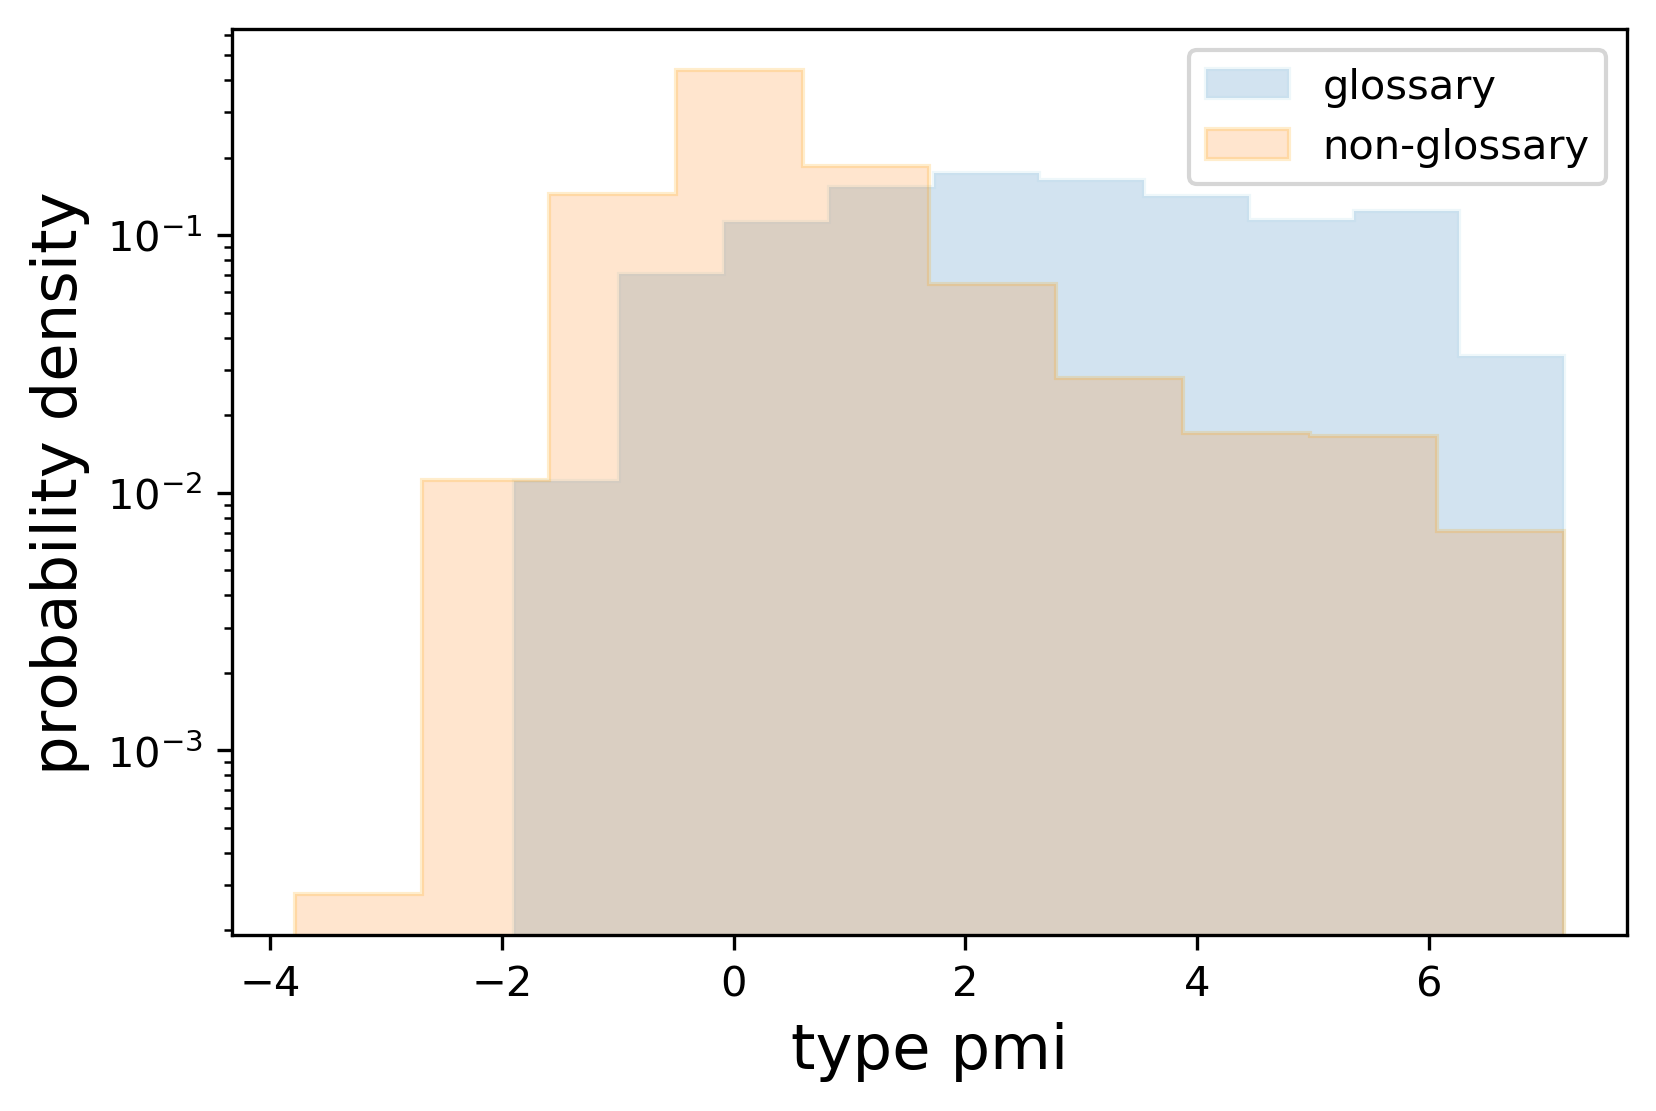

In [11]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)

print(len(gloss_vals))
print(len(not_gloss_vals))

plt.hist(gloss_vals, label="glossary", alpha=0.2, density=True, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(not_gloss_vals, label="non-glossary", alpha=0.2, density=True, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('probability density', fontsize=15)
plt.xlabel('type pmi', fontsize=15)
plt.legend()

print(ttest_ind(gloss_vals, not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

print(np.median(gloss_vals))
print(np.median(not_gloss_vals))

gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms and score < 0.05 and int(row['count']) > 100: 
                print(subreddit, w, score)
            #elif w not in gloss_terms and score > 0.85 and int(row['count']) > 100: 
            #    print(subreddit, w, score)

## TFIDF

In [12]:
gloss_vals = []
not_gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TFIDF_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TFIDF_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['tfidf'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                not_gloss_vals.append(score)
print(np.median(gloss_vals))
print(np.median(not_gloss_vals))
print(mannwhitneyu(gloss_vals, not_gloss_vals, alternative='greater'))

100%|██████████| 474/474 [00:02<00:00, 160.40it/s]


0.5682132008017647
0.02367228428702984
MannwhitneyuResult(statistic=710868532.0, pvalue=0.0)


## Finetuned vs. BERT-base

In [13]:
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_max_sense_pmi/'

diff = Counter()
for filename in tqdm.tqdm(sorted(os.listdir(BASE_SENSE_PMI_DIR))):
    subreddit = filename.replace('.csv', '')
    with open(SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_ft = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_ft[w] = score
    with open(BASE_SENSE_PMI_DIR + filename, 'r') as infile: 
        w2score_base = defaultdict(float)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['max_pmi'])
            w2score_base[w] = score
    for w in sorted(w2score_ft.keys()): 
        diff[(subreddit, w)] = w2score_base[w] - w2score_ft[w]
mc = diff.most_common()
print("BERT-base much higher:", mc[:30])
print("Finetuned much higher:", mc[-30:])
print("Average difference:", np.mean(np.abs(list(diff.values()))), np.var(np.abs(list(diff.values()))))

print("\x1b[31m BERT-base higher \x1b[0m")
print("\x1b[32m Finetuned higher \x1b[0m")
print()
for sr in sr2terms: 
    for w in sr2terms[sr]: 
        difference = diff[(sr, w)]
        if difference > 0.5: 
            print("\x1b[31m", w, sr, difference, "\x1b[0m")
        elif difference <= -0.5:
            print("\x1b[32m", w, sr, difference, "\x1b[0m")

100%|██████████| 474/474 [00:36<00:00, 12.86it/s]


BERT-base much higher: [(('music', 'le'), 4.6549112821129475), (('music', 'pic'), 4.5182507061908685), (('music', 'shake'), 4.293622283620939), (('shittysuperpowers', 'shake'), 4.278443806365962), (('elitedangerous', 'knowledge'), 4.2081391115329545), (('mgtow', 'counting'), 4.078114572052218), (('shittysuperpowers', 'motherfucker'), 3.977689652346828), (('destinythegame', 'movie'), 3.914685137124118), (('eurovision', 'movie'), 3.86393619310109), (('furry_irl', 'dinosaur'), 3.8586316614105622), (('cyberpunkgame', 'slice'), 3.821864952756538), (('notliketheothergirls', 'shake'), 3.780612475053592), (('transcribersofreddit', 'column'), 3.724719466849509), (('random_acts_of_amazon', 'shake'), 3.7081486583610737), (('kotakuinaction', 'knowledge'), 3.699647313826346), (('transcribersofreddit', 'commented'), 3.696334821485988), (('cursedcomments', 'cartoon'), 3.6324008218160486), (('magicarena', 'dive'), 3.6275814504765105), (('chapotraphouse', 'shake'), 3.6012217872168386), (('fightporn', '

## Top 1/2 and 1/4 cutoffs

In [14]:
ROOT = '/mnt/data0/lucy/ingroup_lang/'
LOG_DIR = ROOT + 'logs/' 
SENSE_PMI_DIR = LOG_DIR + 'ft_max_sense_pmi/'
BASE_SENSE_PMI_DIR = LOG_DIR + 'base_most_sense_pmi/'
AG_SENSE_PMI_DIR = LOG_DIR + 'ag_most_sense_pmi/'
TYPE_PMI_DIR = LOG_DIR + 'pmi/'
TFIDF_DIR = LOG_DIR + 'tfidf/'

In [15]:
def get_medians(path, metric): 
    print(metric)
    vals = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word']
                score = float(row[metric])
                vals.append(score)
    ps = []
    for p in [50, 60, 70, 80, 90, 98, 99]: 
        ps.append(np.percentile(vals, p))
    print(ps)
    return np.percentile(vals, 50), np.percentile(vals, 98)

In [16]:
sense_m, sense_t = get_medians(AG_SENSE_PMI_DIR, 'most_pmi')
base_m, base_t = get_medians(BASE_SENSE_PMI_DIR, 'most_pmi')
type_m, type_t = get_medians(TYPE_PMI_DIR, 'pmi')
tfidf_m, tfidf_t = get_medians(TFIDF_DIR, 'tfidf')

most_pmi


100%|██████████| 349/349 [00:10<00:00, 34.27it/s]


[0.14895115956394614, 0.3287207530114394, 0.559320335026982, 0.8865214343393767, 1.4387709219177662, 2.66291875427572, 3.1791692209041433]


  1%|          | 5/474 [00:00<00:12, 37.58it/s]

most_pmi


100%|██████████| 474/474 [00:14<00:00, 33.23it/s]


[0.2789802191673347, 0.48007543419270565, 0.7324234063287886, 1.0796816376343343, 1.646291431133463, 2.8615285178167453, 3.3383727377964716]


  0%|          | 2/474 [00:00<00:26, 18.08it/s]

pmi


100%|██████████| 474/474 [00:32<00:00, 14.80it/s]


[0.14368642975619209, 0.3675468465645889, 0.6636654082573912, 1.110993113597629, 2.016327239070056, 5.006313171329149, 5.882297269019653]


  1%|          | 3/474 [00:00<00:24, 18.91it/s]

tfidf


100%|██████████| 474/474 [00:30<00:00, 15.33it/s]


[0.023602200307241316, 0.03866249375155715, 0.07506182094868809, 0.17762468763824268, 0.5371191533753051, 3.0837233757223963, 4.406706245604466]


In [17]:
def get_glossary_percentage(cutoff, path, metric): 
    '''
    Gets the percentage of glossary words in the cutoff percentile
    '''
    total_count = 0
    recall_count = 0
    recall_set = set()
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '').replace('_0.2', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            reader = csv.DictReader(infile)
            for row in reader: 
                w = row['word'] 
                score = float(row[metric])
                if w in gloss_terms: 
                    if score >= cutoff: 
                        recall_count += 1
                        recall_set.add((subreddit, w))
                    total_count += 1
    return recall_count / total_count, recall_set

In [18]:
percent, sense_set = get_glossary_percentage(sense_t, AG_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, sense_set, = get_glossary_percentage(base_t, BASE_SENSE_PMI_DIR, 'most_pmi')
print(percent)
percent, type_set = get_glossary_percentage(type_t, TYPE_PMI_DIR, 'pmi')
print(percent)
percent, _ = get_glossary_percentage(tfidf_t, TFIDF_DIR, 'tfidf')
print(percent)

  5%|▍         | 23/474 [00:00<00:02, 197.27it/s]

0.25787106446776614


  3%|▎         | 15/474 [00:00<00:05, 85.55it/s]

0.2788104089219331


  4%|▍         | 20/474 [00:00<00:05, 85.28it/s] 

0.1813186813186813


100%|██████████| 474/474 [00:03<00:00, 128.84it/s]

0.16758241758241757


In [19]:
sense_set & type_set

{('antimlm', 'hun')}

In [20]:
# total possible recall of glossary words
total_count = 0
recall_count = 0
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('.csv', '').replace('_0.2', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word'] 
            score = float(row['pmi'])
            if w in gloss_terms: 
                recall_count += 1
    total_count += len(gloss_terms)
print(recall_count / total_count)

100%|██████████| 474/474 [00:03<00:00, 120.27it/s]

0.7761194029850746


### MWE vs single-token scores

In [21]:
'''
single_vals = []
mwe_vals = []
gloss_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                gloss_vals.append(score)
            else: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)
'''
pass

In [22]:
'''
plt.hist(mwe_vals, label="non-glossary MWEs", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-glossary non-MWEs", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.hist(gloss_vals, label="glossary words", alpha=0.2, edgecolor='green', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("all words in subreddits w/ glossaries")
plt.legend()
'''
pass

In [23]:
'''
single_vals = []
mwe_vals = []
for filename in tqdm.tqdm(sorted(os.listdir(TYPE_PMI_DIR))): 
    subreddit = filename.replace('_0.2.csv', '')
    if subreddit not in sr2terms: continue
    gloss_terms = set(sr2terms[subreddit])
    with open(TYPE_PMI_DIR + filename, 'r') as infile: 
        w2score = defaultdict(list)
        reader = csv.DictReader(infile)
        for row in reader: 
            w = row['word']
            score = float(row['pmi'])
            if w in gloss_terms: 
                if len(w.split()) > 1: 
                    mwe_vals.append(score)
                else: 
                    single_vals.append(score)
'''
pass

In [24]:
'''
plt.hist(mwe_vals, label="MWE", alpha=0.2, edgecolor='lightblue', histtype= "stepfilled")
plt.hist(single_vals, label="non-MWE", alpha=0.2, edgecolor='orange', histtype= "stepfilled")
plt.yscale('log')
plt.ylabel('# of words', fontsize=15)
plt.xlabel('type PMI', fontsize=15)
plt.title("only glossary words")
plt.legend()
'''
pass

### Mean reciprocal rank

In [25]:
# highest is first
def rank_highest_first(path): 
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))): 
        subreddit = filename.replace('.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            found = False
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row['most_pmi'])
                if w in gloss_terms: 
                    rr = 1/float(i)
                    ranks.append(i)
                    found = True
                    inv_ranks.append(rr)
                    break
            if not found: 
                inv_ranks.append(0)
    print("Number of values:",len(inv_ranks))
    print("Mean reciprocal rank:",np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:",np.median(ranks))

In [26]:
rank_highest_first(AG_SENSE_PMI_DIR)
rank_highest_first(BASE_SENSE_PMI_DIR)

100%|██████████| 474/474 [00:00<00:00, 7241.67it/s]

Number of values: 43
Mean reciprocal rank: 0.2201520294336277
Highest-scored glossary term's median rank: 8.5
Number of values: 57
Mean reciprocal rank: 0.2723655979664329
Highest-scored glossary term's median rank: 7.0


In [27]:
# lowest is first
def rank_lowest_first(path, metric): 
    """
    The input file is formatted so that the lower values
    are listed in the file first. 
    """
    inv_ranks = []
    ranks = []
    for filename in tqdm.tqdm(sorted(os.listdir(path))):
        subreddit = filename.replace('_0.2.csv', '')
        if subreddit not in sr2terms: continue
        gloss_terms = set(sr2terms[subreddit])
        with open(path + filename, 'r') as infile: 
            w2score = defaultdict(list)
            reader = csv.DictReader(infile)
            i = 0
            top = 0
            last_w = ''
            for row in reader: 
                i += 1
                w = row['word']
                score = float(row[metric])
                if w in gloss_terms: 
                    last_w = w
                    top = i
            if top == 0: 
                inv_ranks.append(0)
            rank = i - top + 1
            inv_ranks.append(1/float(rank))
            ranks.append(rank)
    print("Number of values:", len(inv_ranks))
    print("Mean reciprocal rank:", np.mean(inv_ranks))
    print("Highest-scored glossary term's median rank:", np.median(ranks))

In [28]:
rank_lowest_first(TYPE_PMI_DIR, 'pmi')
rank_lowest_first(TFIDF_DIR, 'tfidf')

  2%|▏         | 11/474 [00:00<00:04, 95.14it/s]

Number of values: 57
Mean reciprocal rank: 0.09375181423128043
Highest-scored glossary term's median rank: 30.0


100%|██████████| 474/474 [00:03<00:00, 123.78it/s]

Number of values: 57
Mean reciprocal rank: 0.20604386284948573
Highest-scored glossary term's median rank: 13.0
